# КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ПЕРСЕПТРОНА


Цель работы: изучение модели нейрона персептрона и архитектуры персептронной однослойной нейронной сети; создание
и исследование моделей персептронных нейронных сетей

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(13)
x_train = np.linspace(-5, 5, 300)
noise = 0.05 * np.random.randn(len(x_train))
y_train = ((np.exp(-x_train) - np.exp(x_train)) * np.cos(x_train)) / (np.exp(x_train) + np.exp(-x_train)) + noise

# Тестовые данные
x_test = np.linspace(-6, 6, 400)
y_test_true = ((np.exp(-x_test) - np.exp(x_test)) * np.cos(x_test)) / (np.exp(x_test) + np.exp(-x_test))

# Преобразование в тензоры
X_train = torch.FloatTensor(x_train).view(-1, 1)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(x_test).view(-1, 1)

# Многослойная сеть для аппроксимации
class ApproxNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )
    
    def forward(self, x):
        return self.net(x)

model = ApproxNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Обучение
print("Обучение сети для аппроксимации (вариант 13)...")
loss_history = []
for epoch in range(1500):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Эпоха {epoch+1}, MSE: {loss.item():.8f}")

# Оценка качества
with torch.no_grad():
    y_pred_train = model(X_train).numpy()
    y_pred_test = model(X_test).numpy()
    mse_train = np.mean((y_train.numpy() - y_pred_train)**2)
    mse_test = np.mean((y_test_true - y_pred_test.flatten())**2)

print(f"\nКачество аппроксимации:")
print(f"  MSE (обучающая выборка): {mse_train:.6f}")
print(f"  MSE (тестовая выборка):   {mse_test:.6f}")

Обучение сети для аппроксимации (вариант 13)...
Эпоха 100, MSE: 0.01755419
Эпоха 200, MSE: 0.00309855
Эпоха 300, MSE: 0.00269214
Эпоха 400, MSE: 0.00241947
Эпоха 500, MSE: 0.00484319
Эпоха 600, MSE: 0.00229119
Эпоха 700, MSE: 0.00270182
Эпоха 800, MSE: 0.00223626
Эпоха 900, MSE: 0.00220196
Эпоха 1000, MSE: 0.00223376
Эпоха 1100, MSE: 0.00218747
Эпоха 1200, MSE: 0.00217025
Эпоха 1300, MSE: 0.00243620
Эпоха 1400, MSE: 0.00216782
Эпоха 1500, MSE: 0.00215709

Качество аппроксимации:
  MSE (обучающая выборка): 0.002157
  MSE (тестовая выборка):   0.003780


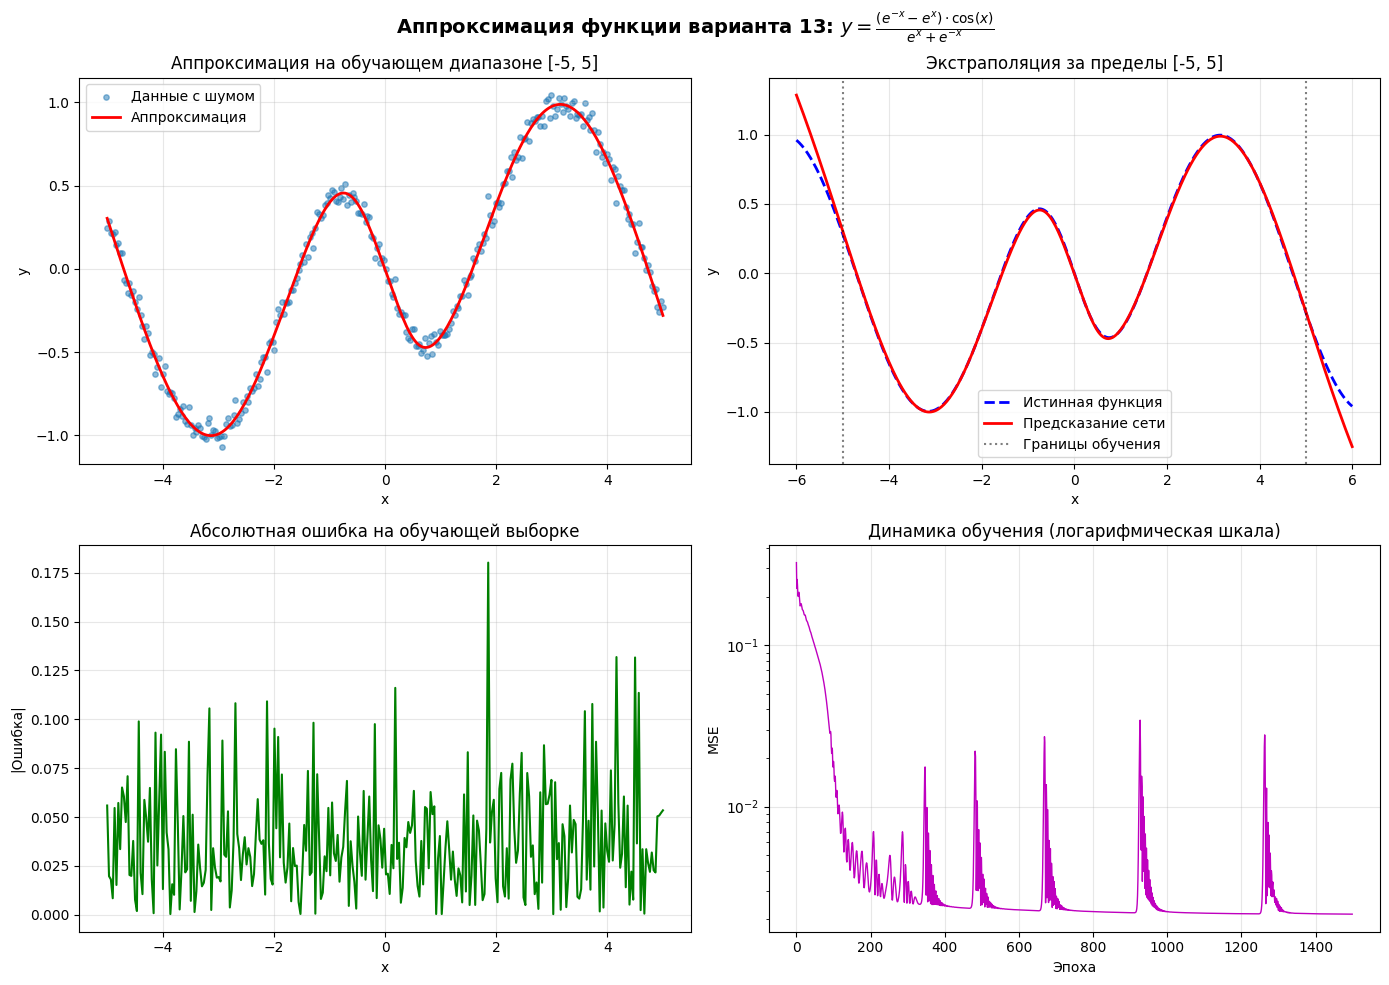

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Аппроксимация на обучающем диапазоне
axes[0, 0].scatter(x_train, y_train.numpy(), s=15, alpha=0.5, label='Данные с шумом')
axes[0, 0].plot(x_train, y_pred_train, 'r-', linewidth=2, label='Аппроксимация')
axes[0, 0].set_title('Аппроксимация на обучающем диапазоне [-5, 5]')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. Экстраполяция за пределы обучающего диапазона
axes[0, 1].plot(x_test, y_test_true, 'b--', linewidth=2, label='Истинная функция')
axes[0, 1].plot(x_test, y_pred_test, 'r-', linewidth=2, label='Предсказание сети')
axes[0, 1].axvline(x=-5, color='k', linestyle=':', alpha=0.5, label='Границы обучения')
axes[0, 1].axvline(x=5, color='k', linestyle=':', alpha=0.5)
axes[0, 1].set_title('Экстраполяция за пределы [-5, 5]')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# 3. Ошибка аппроксимации
axes[1, 0].plot(x_train, np.abs(y_train.numpy() - y_pred_train), 'g-', linewidth=1.5)
axes[1, 0].set_title('Абсолютная ошибка на обучающей выборке')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('|Ошибка|')
axes[1, 0].grid(True, alpha=0.3)

# 4. Динамика обучения
axes[1, 1].plot(loss_history, 'm-', linewidth=1)
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Динамика обучения (логарифмическая шкала)')
axes[1, 1].set_xlabel('Эпоха')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Аппроксимация функции варианта 13: $y = \\frac{(e^{-x} - e^{x}) \\cdot \\cos(x)}{e^{x} + e^{-x}}$', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()